<a href="https://colab.research.google.com/github/Python-Neiva/CNN-housing-ca-olive-oil/blob/main/Neural_Networks_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment II

The preffered approach wil be by using Python with TensorFlow & Keras

# Data Visualization and Feature Analysis:

### Data exploration



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# housingDatasetPath = "contents/housing.csv"
housingDatasetPath = "https://raw.githubusercontent.com/Python-Neiva/CNN-housing-ca-olive-oil/refs/heads/main/housing.csv"
# Load the California housing dataset
try:
    housing = pd.read_csv(housingDatasetPath)
except FileNotFoundError:
    print("Error: "+housingDatasetPath+" not found. Please ensure the file is in the correct directory or provide the correct path.")
    exit()

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
#missing data is identified in total_bedrooms by using the .info() function
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
import pandas as pd

# Handling missing values in 'total_bedrooms'
median_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Encoding categorical features (ocean_proximity)
housing = pd.get_dummies(housing, columns=['ocean_proximity'], prefix='ocean')


housing.info()


In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster_4,cluster_5,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,4,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,4,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,4,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,4,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,1,False,False,False,True,False


 Target variable (median_house_value)

Idea of checking for Null values taken from [Kaggle](https://www.kaggle.com/code/neosoftwaredev/notebook16e4e5c499)

In [42]:
#declaring Checking % of Null values
def check_null_values(df):

  return round(100*(df.isnull().sum()/len(df.index)),2)

check_null_values(df=housing)

,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0
cluster_4,0.0


 The utilization of the housing.hist() function serves a crucial purpose in understanding the underlying distribution of the housing dataset. By generating histograms for each numerical feature, the visualization provides insights into the frequency, spread, central tendency, and overall shape of the data. This will allow one analising the data to ascertain the range of values, identify common and uncommon occurrences, and detect any unusual patterns or potential outliers. Consequently, the visualization aids in comprehending the fundamental characteristics of the housing data, facilitating a more informed and comprehensive analysis of the dataset. This understanding is crucial for subsequent steps in the data science process, such as feature selection, model development, and ultimately, the extraction of meaningful insights from the data.

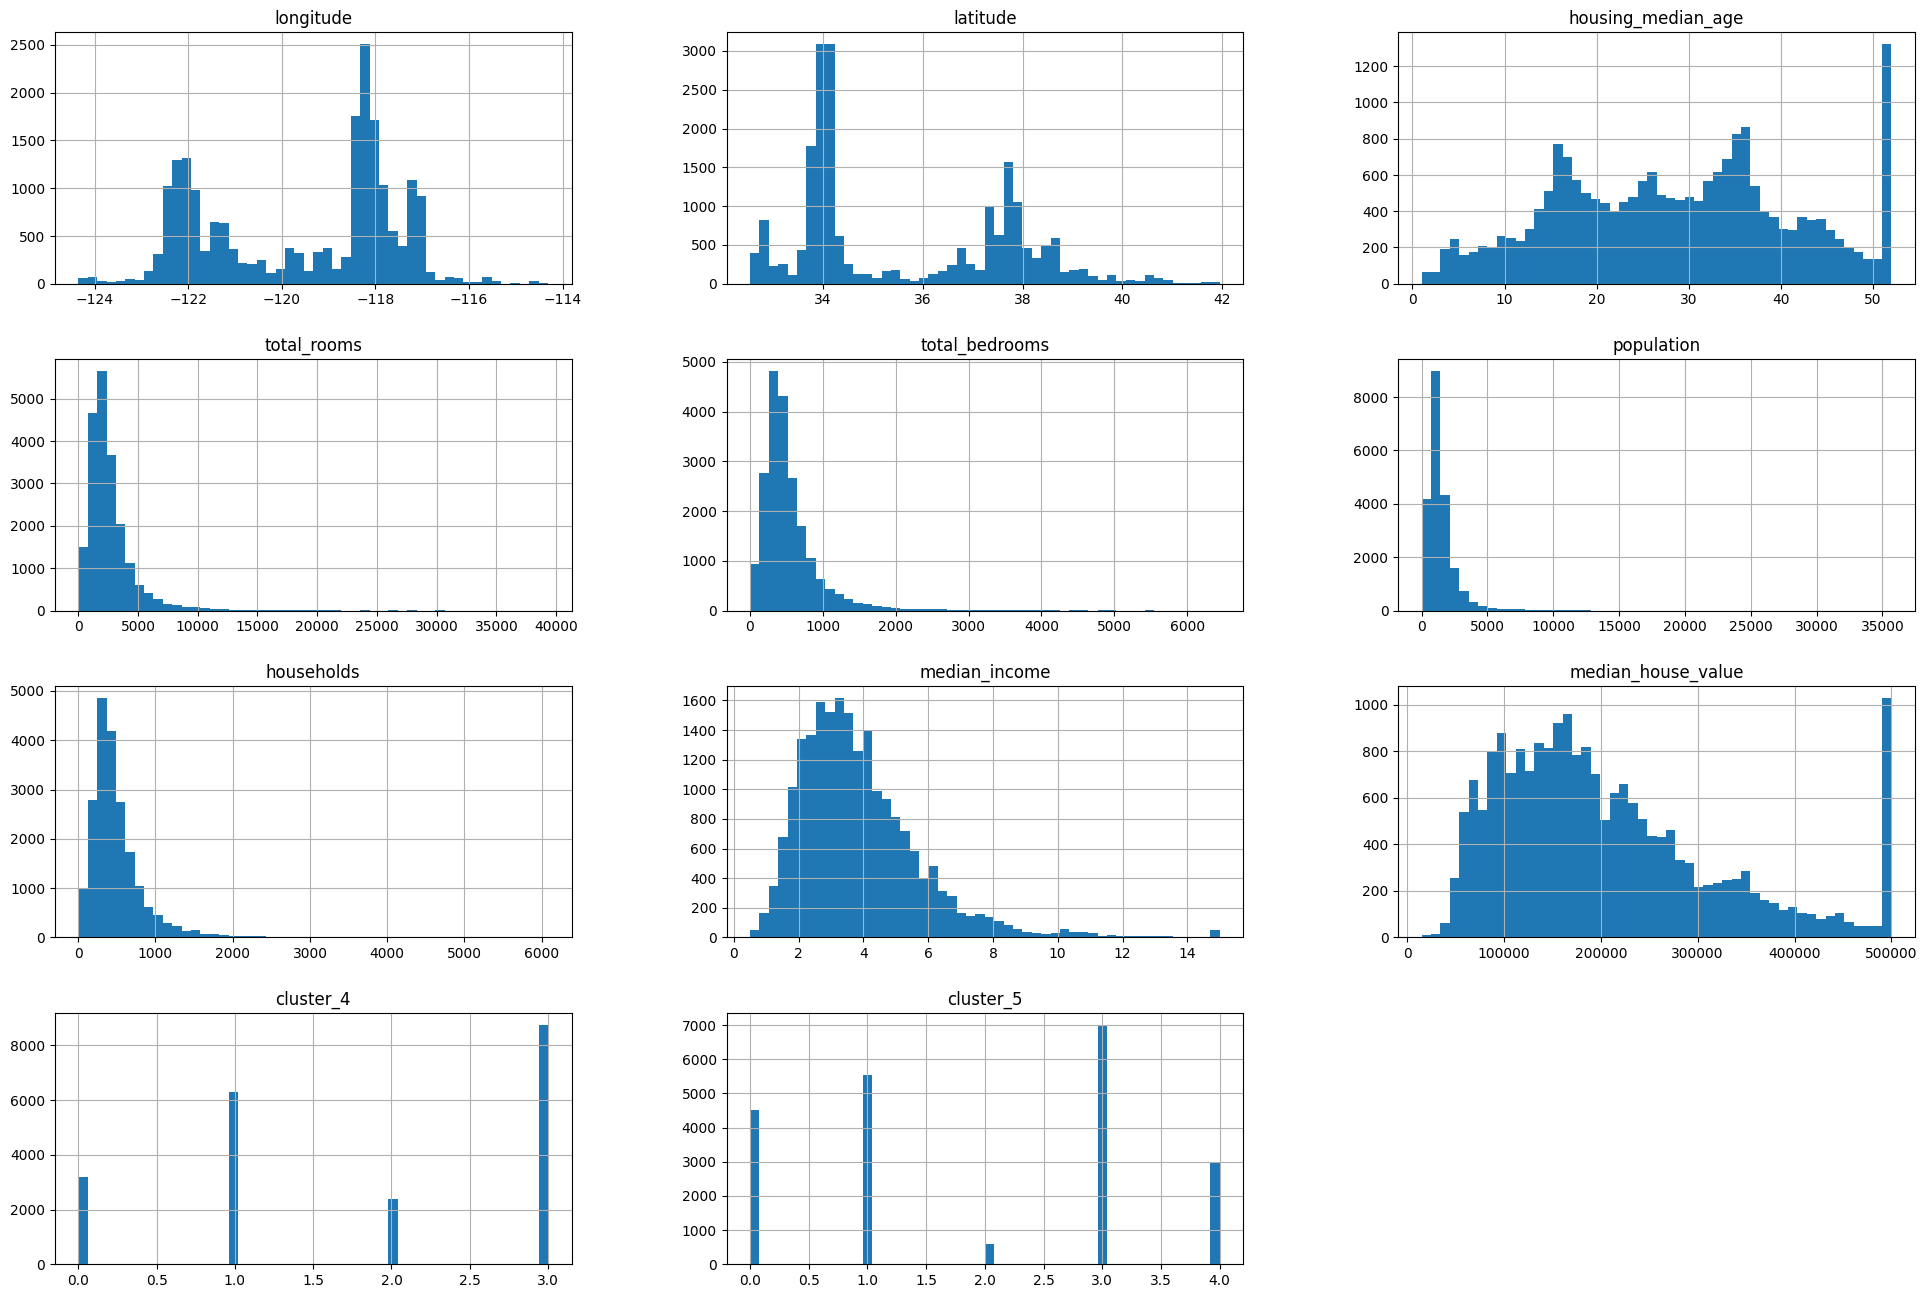

In [46]:
housing.hist(bins=50, figsize=(24,16))
plt.show()

###Median House Value Distribution with Location

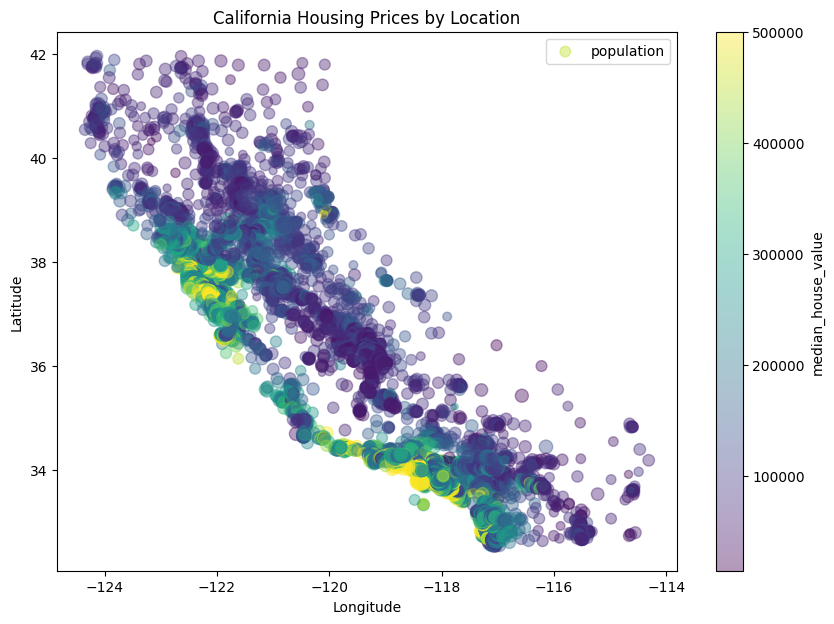

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# code that load the housing data frame should be executed frist

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=np.log(housing["population"])*10, label="population",
             figsize=(10,7), c="median_house_value",
             cmap=plt.get_cmap("viridis"), colorbar=True, sharex=False)

plt.title("California Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

### PCA Analysis



> The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. by: [geeksforgeeks](https://www.geeksforgeeks.org/principal-component-analysis-pca/)



Note: see how coul I use https://blog.tensorflow.org/2020/02/distributed-pca-using-tfx.html

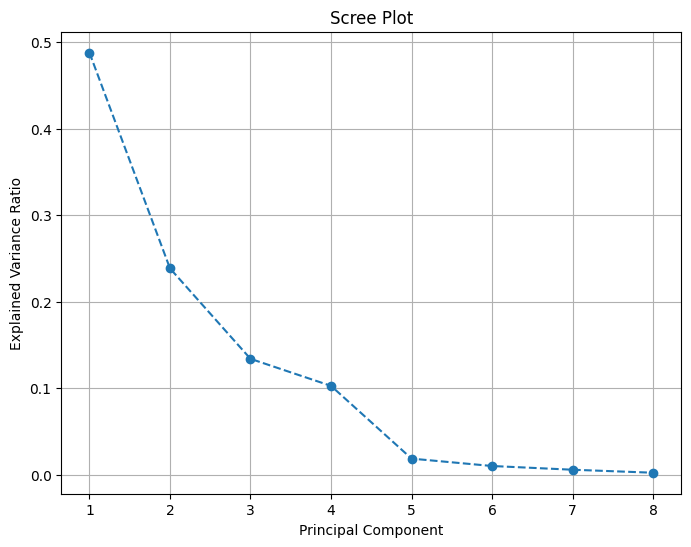

Explained Variance Ratio per Principal Component:
PC1: 0.4876
PC2: 0.2385
PC3: 0.1340
PC4: 0.1028
PC5: 0.0187
PC6: 0.0102
PC7: 0.0059
PC8: 0.0024


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X = housing[numerical_features]

# Separate the target variable
y= housing['median_house_value']

# Handle missing values as identified before by imputing with the mean
X= X.fillna(X.mean())

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Print the explained variance ratio for each component
print("Explained Variance Ratio per Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Expected Result and Analysis:

# The scree plot visualizes the proportion of variance explained by each principal component.
# Typically, you look for an "elbow" in the plot. The components before the elbow capture a significant amount of variance, while those after explain much less.
# A general rule of thumb is to choose the number of components that explain at least 70-80% of the total variance.
# For example: if the first 3 PC's explain 80% of the data, you may consider 3 PCs to be sufficient to capture the data and dimensionality could be reduced to 3.

# Potential analysis that can be performed after plotting:

# 1. To determine the number of principal components to retain: Look for the "elbow" point on the scree plot or identify the point at which the variance explained begins to level off. This determines the number of significant PCs.

# 2. Feature Importance from loadings: Examine the loadings (coefficients) of the original variables on the selected principal components. This tells us which original variables contribute most to the new components and can aid in interpretation. High magnitude loadings would suggest higher influence on PC's.

# 3. To visualize the data in the lower dimensional space: Plot the data points in the 2D or 3D space spanned by the most important principal components. This enables visualization of patterns and clusters in the reduced data space, using the selected PC's as the axes.


#----------------
# It is determined to use only up to the forth, because from there it begins to level off.

 - It is possible to identify an elbow point, which is the point where the explained variance ratio starts to level off, at the 4th PCA.
 - Retaining the first four components would capture 96.29% of the total variance, which is usually sufficient for most analyses.

In [8]:
print("Loadings")
loadings = pca.components_
print(loadings)

print("\n")
# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Analyze the scree plot and cumulative variance
# The scree plot helps identify the "elbow point" where adding more components provides diminishing returns.
# The cumulative variance tells you how much variance is captured by a given number of components.
# Look for the number of components that explains a satisfactory amount of variance (e.g., 95%).
print("Cumulative Variance:",cumulative_variance)
# Example: If the first 3 components explain 90% of the variance, you might choose to use only those 3.


# This PCA analysis suggests to include the first 4 features,
# due to the cumulative varianche shows whtat with this we can achieve up to  0.93734947 of the cummulative variance.

Loadings
[[ 0.07604792 -0.07335636 -0.21869248  0.48415233  0.48967183  0.47214856
   0.49177887  0.04534828]
 [-0.70121462  0.70195612  0.01575144  0.07508366  0.06045968  0.02643177
   0.06388968 -0.03512969]
 [-0.05566974  0.01235477 -0.39382497  0.09268122 -0.11731142 -0.11639756
  -0.10951996  0.89092948]
 [-0.06971512 -0.09882874  0.88633314  0.11518588  0.06400963  0.08228824
   0.09644     0.40785928]
 [-0.09967246 -0.04929517 -0.03433704 -0.3086685  -0.39426748  0.84635687
  -0.12832711  0.05427219]
 [ 0.4792778   0.4655526   0.09174335  0.55980265 -0.23426038  0.1257729
  -0.39719374 -0.05742912]
 [-0.50067292 -0.51986642 -0.04050888  0.55725338 -0.24111648 -0.03160144
  -0.28061887 -0.17032465]
 [ 0.06511739  0.05026287 -0.00202363  0.13753108 -0.68574412 -0.15139329
   0.69267503 -0.03675387]]


Cumulative Variance: [0.48760684 0.72607786 0.8600578  0.96281274 0.98152031 0.99170425
 0.99758164 1.        ]


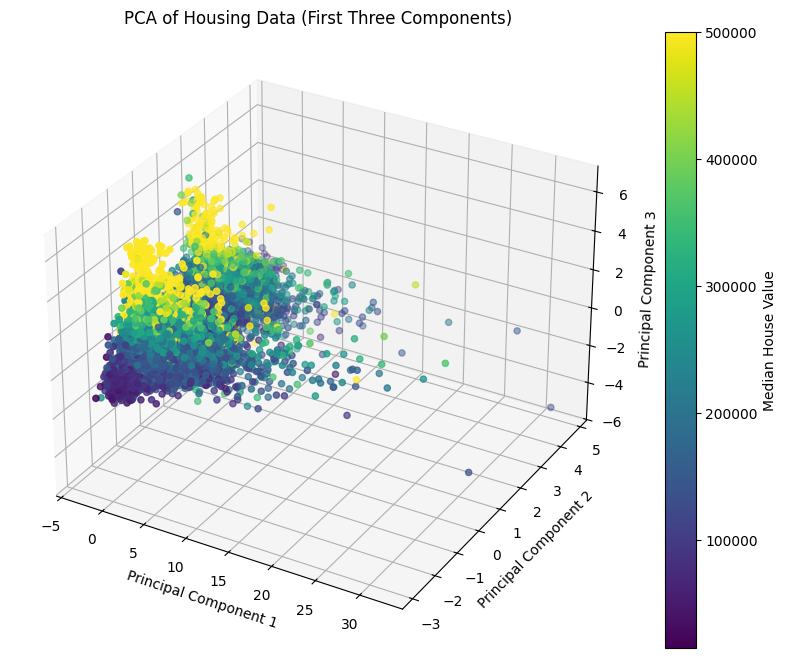

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

# We apply PCA again, due to now we want to use the first 4 Principal components.
# Select numerical features for PCA
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X = housing[numerical_features]

# Separate the target variable
y= housing['median_house_value']

# Handle missing values as identified before by imputing with the mean
X = X.fillna(X.mean())
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=4) # Due to past PCA was done with all the numeric features, we redo it only with the first four.
X_pca = pca.fit_transform(X_scaled)

# Convert X_pca to a pandas DataFrame with appropriate column names
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # create a 3D subplot

# Scatter plot with color based on 'median_house_value'
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                    c=housing['median_house_value'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Housing Data (First Three Components)')

# Add a colorbar
fig.colorbar(scatter, label='Median House Value')
# Add grid
ax.grid(True)

plt.show()


In [10]:
loadings = pca.components_
loadings


array([[ 0.07604792, -0.07335636, -0.21869248,  0.48415233,  0.48967183,
         0.47214856,  0.49177887,  0.04534828],
       [-0.70121462,  0.70195612,  0.01575144,  0.07508366,  0.06045968,
         0.02643177,  0.06388968, -0.03512969],
       [-0.05566974,  0.01235477, -0.39382497,  0.09268122, -0.11731142,
        -0.11639756, -0.10951996,  0.89092948],
       [-0.06971512, -0.09882874,  0.88633314,  0.11518588,  0.06400963,
         0.08228824,  0.09644   ,  0.40785928]])

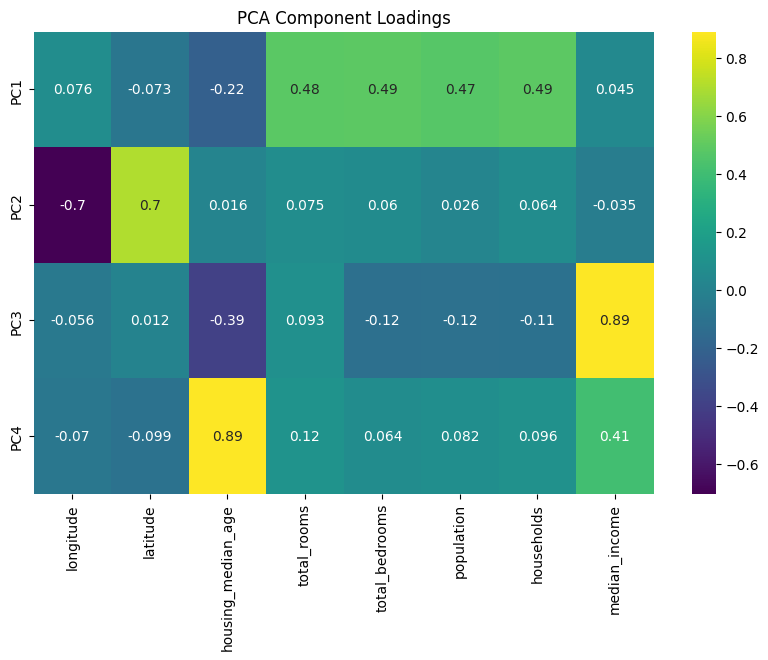

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# using'loadings', which is the array obtained from pca.components_
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='viridis',
            xticklabels=numerical_features,  # features
            yticklabels=['PC1', 'PC2', 'PC3', 'PC4']) #  Principal Components
plt.title('PCA Component Loadings')
plt.show()

### K-means Clustering Analysis

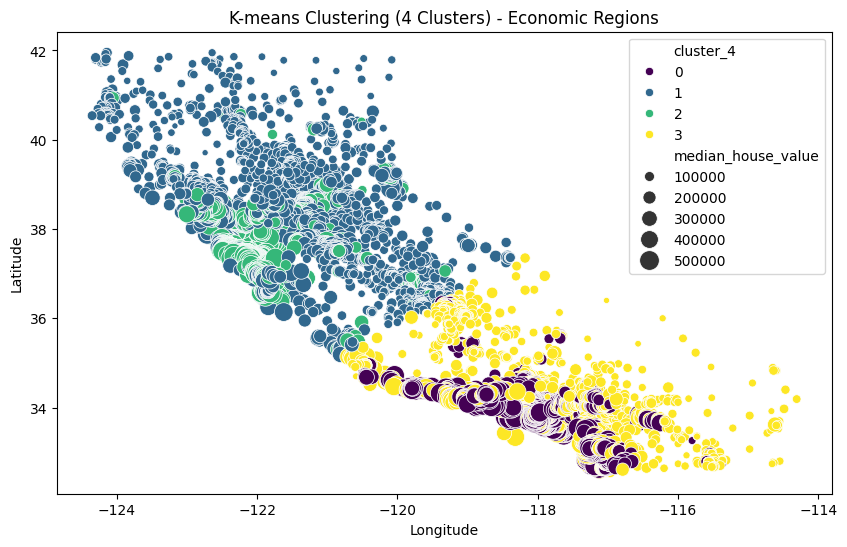

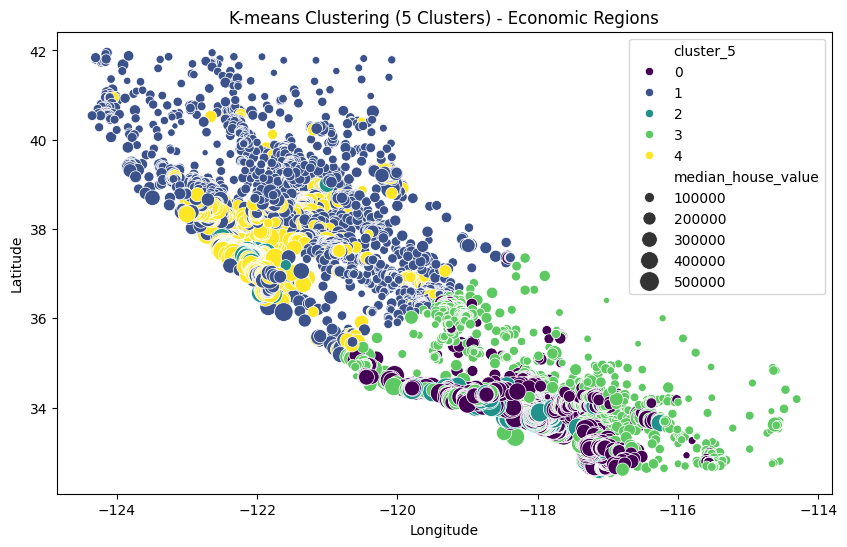

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use 'longitude', 'latitude', and 'median_income' for clustering
economic_features = ['longitude', 'latitude', 'median_income']
economic_data = housing[economic_features]

# K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
housing['cluster_4'] = kmeans_4.fit_predict(economic_data)

# K-means with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
housing['cluster_5'] = kmeans_5.fit_predict(economic_data)

# Plotting for 4 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_4', size='median_house_value', data=housing, palette='viridis', sizes=(20, 200))
plt.title('K-means Clustering (4 Clusters) - Economic Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plotting for 5 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_5', size='median_house_value', data=housing, palette='viridis', sizes=(20, 200))
plt.title('K-means Clustering (5 Clusters) - Economic Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:

# #Installing the required libraries

# #ensuring a compatible version of skit-learn
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

# !pip install tensorflow
# !pip install scikeras



## 1.2 Regression Model Based on Neural Network



 - Hidden Layers: 1 to 5
 - Neurons per Hidden Layer: 10 to 20 (or more)
 - Batch Size: 64, 128
 - Number of Epochs: 100, 200, 400
 - Learning Rate: 0.0001, 0.0005, 0.001
 - Solver: Adam, SDG

In [14]:

!pip install tensorflow
!pip install scikeras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasRegressor

In [ ]:
 ## trying with my own custom randomizedSearch, due to it did not work.
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasRegressor
import random


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, housing['median_house_value'], test_size=0.2, random_state=42)

# Function to create the model
def create_model(hidden_layers=1, neurons=10, learning_rate=0.001, solver='adam', ):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))  # Output layer
    #applying solver according to hyperparameters
    optimizer = Adam(learning_rate=learning_rate) if solver == 'adam' else SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Function to perform a single model evaluation
def evaluate_model(X_train, y_train, X_test, y_test, params, batch_size=64, epochs=100):
    model = create_model(**params)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    # model.fit(X_train, y_train, epochs=trainng_params['epochs'], batch_size=trainng_params['batch_size'], verbose=0)
    y_pred = model.predict(X_test)
    # Check for and handle NaN values in y_pred
    y_pred = np.nan_to_num(y_pred)  # Replace NaN with 0

    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the search space
param_dist = {
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [10, 15, 20, 30],

    'learning_rate': [0.0001, 0.0005, 0.001],
    'solver': ['adam', 'sgd']
}

training_params = {
    'batch_size': [64, 128],
    'epochs': [100, 200, 400],
}
# Number of iterations for the random search
n_iter = 10

# Store results
results = []
for batch in training_params['batch_size']:
  for epoch in training_params['epochs']:
    # Loop to run iterations of Random Search
      for i in range(n_iter):
        params = {k: random.choice(v) for k,v in param_dist.items()}
        mse = evaluate_model(X_train, y_train, X_test, y_test, params, batch, epoch)
        results.append({'params':params, 'mse':mse})
        print(f"Iteration {i+1}/{n_iter}: MSE = {mse:.4f} with Params = {params}")

# Find the best parameters
best_result = min(results, key=lambda x: x['mse'])
print(f"\nBest MSE: {best_result['mse']:.4f}")
print(f"Best Parameters: {best_result['params']}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 1/10: MSE = 4532622983.1614 with Params = {'hidden_layers': 4, 'neurons': 30, 'learning_rate': 0.0001, 'solver': 'adam'}
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 2/10: MSE = 4625756913.5739 with Params = {'hidden_layers': 3, 'neurons': 10, 'learning_rate': 0.0005, 'solver': 'adam'}
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 3/10: MSE = 4623492223.4789 with Params = {'hidden_layers': 3, 'neurons': 10, 'learning_rate': 0.0005, 'solver': 'adam'}
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 4/10: MSE = 55334467025.2374 with Params = {'hidden_layers': 4, 'neurons': 20, 'learning_rate': 0.0005, 'solver': 'sgd'}
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 5/10: MSE = 5229071032.0985 with Params = {'hidden_layers': 2, 'neurons': 15, 'learning_rate': 0.0005, 'solver': 'adam'}
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 6/10: MSE = 4636983581.1295 with Params = {'hidden_layers': 2, 'neurons': 15, 'learning_r

In [ ]:
# Ensure X_train is a 2D array or DataFrame
print(type(X_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.frame.DataFrame'>
print(X_train.shape)  # Should be (number_of_samples, number_of_features)

# Ensure y_train is a 1D array or Series
print(type(y_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.series.Series'>
print(y_train.shape)  # Should be (number_of_samples,)


A figure illustrating training error curves (MSE and MAE) in relation to epochs.

A regression figure that visually compares actual house prices with predicted house prices.

10 example cases of predicted house prices along with their corresponding actual house
prices.

Calculated values of MSE, MAE, and R2 for the test dataset.

# Problem 2 – Building a neural network classifier

# Report

## 1. Explain the principle of stochastic gradient descent and its advantages and disadvantages.


## 2. When there are fewer training and test data available, what methods or measures are needed to take to improve the training and test accuracies in this context?

## 3. How can your neural network-based simulation or computation assist a property management company in evaluating property prices in a metropolitan area in Australia?